In [1]:
import numpy as np

In [16]:
def iou(rect1, rect2):
    print rect1, rect2
    x1 = rect1[0]
    y1 = rect1[1]
    w1 = rect1[2] - rect1[0]
    h1 = rect1[3] - rect1[1]

    x2 = rect2[0]
    y2 = rect2[1]
    w2 = rect2[2] - rect2[0]
    h2 = rect2[3] - rect2[1]

    endx = max(x1+w1, x2+w2)
    startx = min(x1, x2)
    w = w1+w2-(endx-startx)
    endy = max(y1+h1, y2+h2)
    starty = min(y1, y2)
    h = h1+h2-(endy-starty)

    if w==0 or h==0:
        return 0

    area = w*h
    area1 = w1*h1
    area2 = w2*h2
    return area*1.0/(area1+area2-area)

In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap


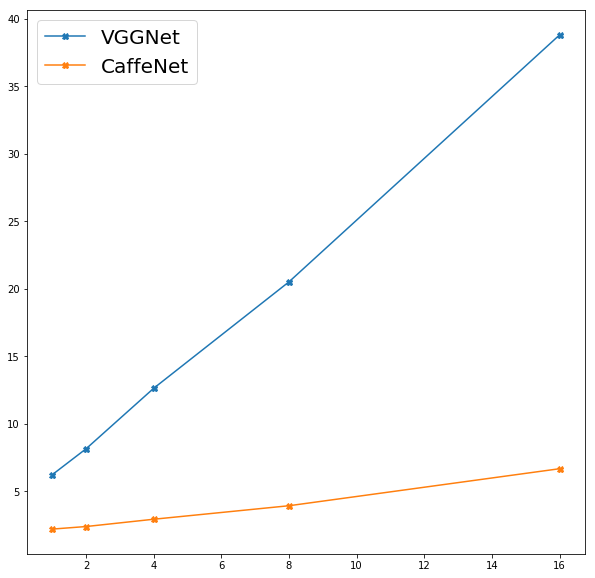

In [9]:
x = [1,2,4,8,16]
y1 = [6.23,8.15,12.63,20.51,38.79]
y2 = [2.20,2.39,2.93,3.93,6.67]
y3 = x

fig, ax = plt.subplots()
ax.plot(x,y1,label='VGGNet',marker='X')
ax.plot(x,y2,label='CaffeNet',marker='X')
ax.legend(loc="upper left",fontsize=20)

### Success Plot

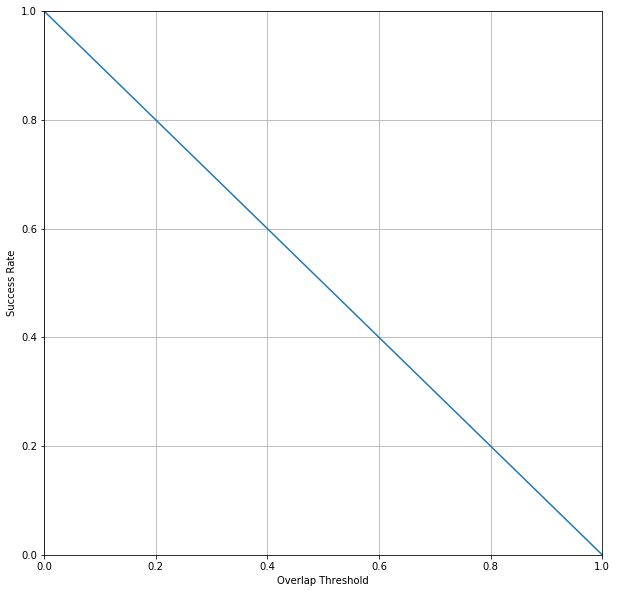

In [11]:
x = np.arange(0,1.1,0.01)
y = np.arange(1,-0.1,-0.01)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.grid()
ax.set_xlabel('Overlap Threshold')
ax.set_ylabel('Success Rate')

In [4]:
prediction = open('./build/src/pred_vgg.txt', 'r')
gts = open('./build/src/gt.txt', 'r')
bboxes_gt = []
bboxes_pred = []
for gt in gts.readlines():
    pred = prediction.readline()
    bbox_gt = map(int, gt.strip().split(' ')[1:])
    bbox_pred = map(int, pred.strip().split(' ')[1:])
    bboxes_gt.append(bbox_gt)
    bboxes_pred.append(bbox_pred)

In [5]:
prediction = open('./build/src/pred_caffe.txt', 'r')
gts = open('./build/src/gt_caffe.txt', 'r')
bboxes_gt_caffe = []
bboxes_pred_caffe = []
for gt in gts.readlines():
    pred = prediction.readline()
    bbox_gt = map(int, gt.strip().split(' ')[1:])
    bbox_pred = map(int, pred.strip().split(' ')[1:])
    bboxes_gt_caffe.append(bbox_gt)
    bboxes_pred_caffe.append(bbox_pred)

In [6]:
prediction = open('./build/src/pred_trad.txt', 'r')
gts = open('./build/src/gt_trad.txt', 'r')
bboxes_gt_trad = []
bboxes_pred_trad = []
for gt in gts.readlines():
    pred = prediction.readline()
    bbox_gt = map(int, gt.strip().split(' ')[1:])
    bbox_pred = map(int, pred.strip().split(' ')[1:])
    bboxes_gt_trad.append(bbox_gt)
    bboxes_pred_trad.append(bbox_pred)

In [7]:
prediction = open('./build/src/pred_dlt.txt', 'r')
gts = open('./build/src/gt_dlt.txt', 'r')
bboxes_gt_dlt = []
bboxes_pred_dlt = []
for gt in gts.readlines():
    pred = prediction.readline()
    bbox_gt = map(int, gt.strip().split(' ')[1:])
    bbox_pred = map(int, pred.strip().split(' ')[1:])
    bboxes_gt_dlt.append(bbox_gt)
    bboxes_pred_dlt.append(bbox_pred)

In [8]:
prediction = open('./build/src/pred_cf2.txt', 'r')
gts = open('./build/src/gt_cf2.txt', 'r')
bboxes_gt_cf2 = []
bboxes_pred_cf2 = []
for gt in gts.readlines():
    pred = prediction.readline()
    bbox_gt = map(int, gt.strip().split(' ')[1:])
    bbox_pred = map(int, pred.strip().split(' ')[1:])
    bboxes_gt_cf2.append(bbox_gt)
    bboxes_pred_cf2.append(bbox_pred)

In [5]:
def iou(rect1, rect2):
    x1 = rect1[0]
    y1 = rect1[1]
    w1 = rect1[2]
    h1 = rect1[3]

    x2 = rect2[0]
    y2 = rect2[1]
    w2 = rect2[2]
    h2 = rect2[3]

    endx = max(x1+w1, x2+w2)
    startx = min(x1, x2)
    w = w1+w2-(endx-startx)
    endy = max(y1+h1, y2+h2)
    starty = min(y1, y2)
    h = h1+h2-(endy-starty)

    if w==0 or h==0:
        return 0

    area = w*h
    area1 = w1*h1
    area2 = w2*h2
    return area*1.0/(area1+area2-area)

In [6]:
def success_rate(bboxes_gt, bboxes_pred, thresh):
    success = 0
    for i in range(len(bboxes_gt)):
        if(iou(bboxes_gt[i], bboxes_pred[i])>thresh):
            success += 1
    return success*1.0/len(bboxes_gt)

In [7]:
success_rate(bboxes_gt,bboxes_pred,0.6)

0.8402678144428503

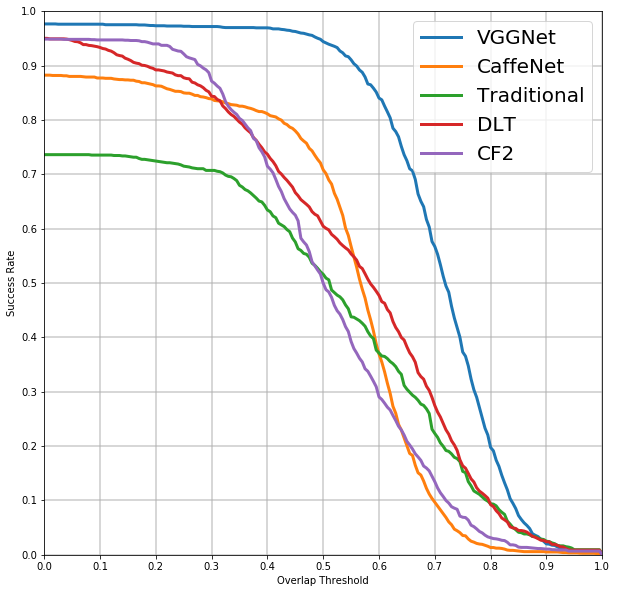

In [31]:
x = np.arange(0,1.1,0.005)
y = map(lambda x:success_rate(bboxes_gt, bboxes_pred, x), x)
y2 = map(lambda x:success_rate(bboxes_gt_caffe, bboxes_pred_caffe, x), x)
y3 = map(lambda x:success_rate(bboxes_gt_trad, bboxes_pred_trad, x), x)
y4 = map(lambda x:success_rate(bboxes_gt_dlt, bboxes_pred_dlt, x), x)
y5 = map(lambda x:success_rate(bboxes_gt_cf2, bboxes_pred_cf2, x), x)

fig, ax = plt.subplots()
ax.plot(x,y,linewidth=3,label='VGGNet')
ax.plot(x,y2,linewidth=3,label='CaffeNet')
ax.plot(x,y3,linewidth=3,label='Traditional')
ax.plot(x,y4,linewidth=3,label='DLT')
ax.plot(x,y5,linewidth=3,label='CF2')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_yticks(np.arange(0,1.1,0.1))
ax.grid(linewidth=2, alpha=0.5)
ax.set_xlabel('Overlap Threshold')
ax.set_ylabel('Success Rate')
ax.legend(loc="upper right",fontsize=20)

In [13]:
def auc(x, y):
    sum = 0
    for i in range(x.shape[0]-1):
        dx = x[i+1] - x[i]
        sum += dx*y[i]
    return sum

In [24]:
print auc(x,y)
print auc(x,y2)
print auc(x,y3)
print auc(x,y4)
print auc(x,y5)

0.698333333333
0.505116482236
0.443519968677
0.538521363418
0.4960570382


### Precision plot

In [2]:
def precision(bboxes_gt, bboxes_pred, thresh):
    success = 0
    for i in range(len(bboxes_gt)):
        center_gt = [bboxes_gt[i][0]+bboxes_gt[i][2]/2.0, bboxes_gt[i][1]+bboxes_gt[i][3]/2.0]
        center_pred = [bboxes_pred[i][0]+bboxes_pred[i][2]/2.0, bboxes_pred[i][1]+bboxes_pred[i][3]/2.0]
        dist = math.sqrt((center_gt[0]-center_pred[0])**2+(center_gt[1]-center_pred[1])**2)
        if dist < thresh:
            success += 1
    return success*1.0/len(bboxes_gt)

0.969870875179 0.868957483984 0.7329678935 0.945751320211 0.94610151753


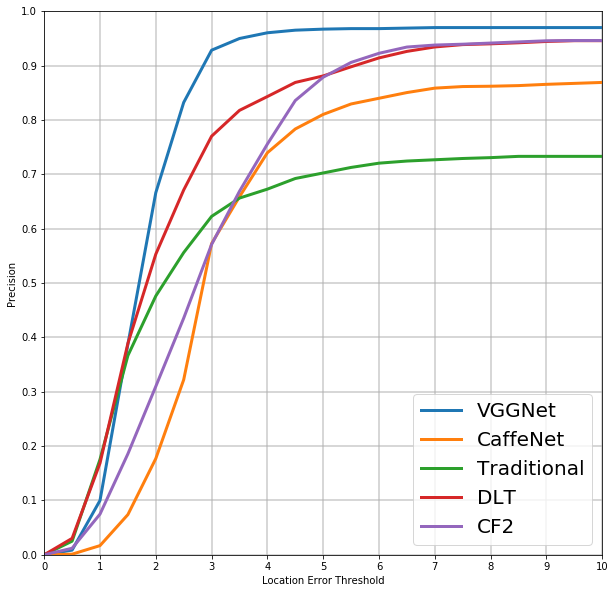

In [9]:
x = np.arange(0,10.5,0.5)
y = map(lambda x:precision(bboxes_gt, bboxes_pred, x), x)
y2 = map(lambda x:precision(bboxes_gt_caffe, bboxes_pred_caffe, x), x)
y3 = map(lambda x:precision(bboxes_gt_trad, bboxes_pred_trad, x), x)
y4 = map(lambda x:precision(bboxes_gt_dlt, bboxes_pred_dlt, x), x)
y5 = map(lambda x:precision(bboxes_gt_cf2, bboxes_pred_cf2, x), x)

from scipy import interpolate
f = interpolate.interp1d(x,y,kind='cubic')
nx = np.arange(0,10.05,0.05)
ny = f(nx)

fig, ax = plt.subplots()
ax.plot(x,y,linewidth=3,label='VGGNet')
ax.plot(x,y2,linewidth=3,label='CaffeNet')
ax.plot(x,y3,linewidth=3,label='Traditional')
ax.plot(x,y4,linewidth=3,label='DLT')
ax.plot(x,y5,linewidth=3,label='CF2')
ax.set_xlim(0,10)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(0,11,1))
ax.set_yticks(np.arange(0,1.1,0.1))
ax.grid(linewidth=2, alpha=0.5)
ax.set_xlabel('Location Error Threshold')
ax.set_ylabel('Precision')
ax.legend(loc="best",fontsize=20)

print y[-1], y2[-1], y3[-1], y4[-1], y5[-1]

### velocity

5999 5999 5999


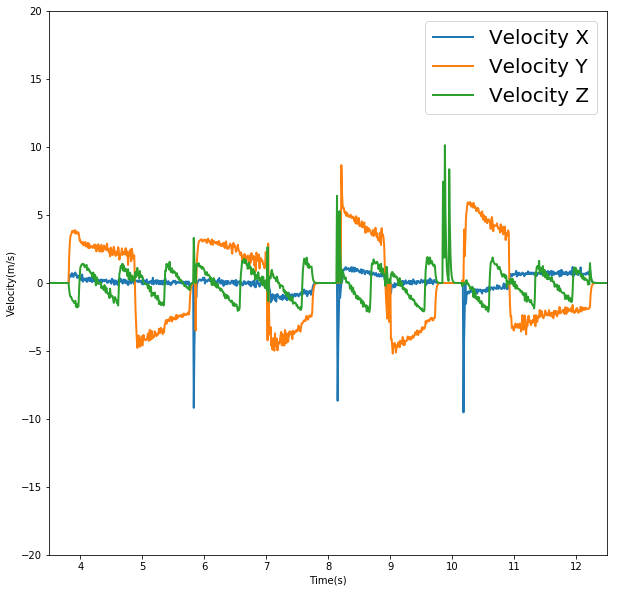

In [3]:
FPS = 100
velocity = open('/home/jing/Documents/QtProjects/tracking/test/build/velocity.txt', 'r')
vx = []
vy = []
vz = []
low_pass = 0.5
last_v = [0,0,0]
for line in velocity.readlines():
    v = map(float, line.strip().split(' '))
    if abs(v[0]-last_v[0])<200:
        last_v[0] = last_v[0]*low_pass+v[0]*(1-low_pass)
        vx.append(last_v[0]/(1000/FPS))
    else:
        vx.append(0)
    if abs(v[1]-last_v[1])<200:
        last_v[1] = last_v[1]*low_pass+v[1]*(1-low_pass)
        vy.append(last_v[1]/(1000/FPS))
    else:
        vy.append(0)
    if abs(v[2]-last_v[2])<200:
        last_v[2] = last_v[2]*low_pass+v[2]*(1-low_pass)
        vz.append(last_v[2]/(1000/FPS))
    else:
        vz.append(0)
print len(vx), len(vy), len(vz)
t = np.arange(0,59.99,1.0/FPS)
fig, ax = plt.subplots()
ax.plot(t,vx,linewidth=2,label='Velocity X')
ax.plot(t,vy,linewidth=2,label='Velocity Y')
ax.plot(t,vz,linewidth=2,label='Velocity Z')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Velocity(m/s)')
ax.set_ylim(-20,20)
ax.set_xlim(3.5,12.5)
ax.legend(loc="best",fontsize=20)

### Heatmap

In [133]:
landing = open('landing.txt','r')
pts = []
for l in landing.readlines():
    pt = map(float, l.strip().split(' '))
    if pt[0]<0 or pt[0]>1525 or pt[1]<0 or pt[1]>2740:
        continue
    pts.append(pt)
pts = np.array(pts)
pts.shape

(239, 2)

(0, 1525)

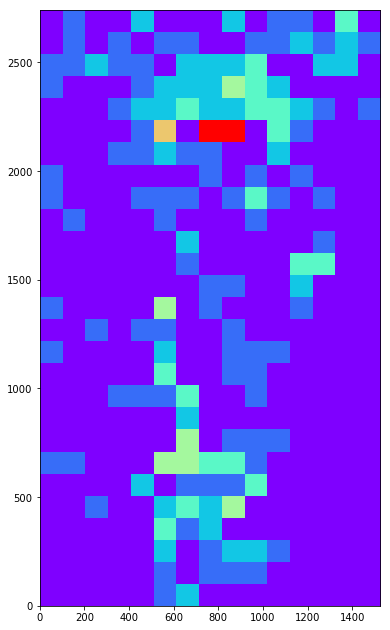

In [134]:
fig, ax = plt.subplots()
fig.set_figheight(2.740*4)
fig.set_figwidth(1.525*4)
counts, xedges, yedges, image = ax.hist2d(pts[:,0], pts[:,1], bins=[15,27], range=[[0,1525],[0,2740]], cmap=plt.get_cmap('rainbow'))
ax.set_ylim(0,2740)
ax.set_xlim(0,1525)
#ax.axis('off')

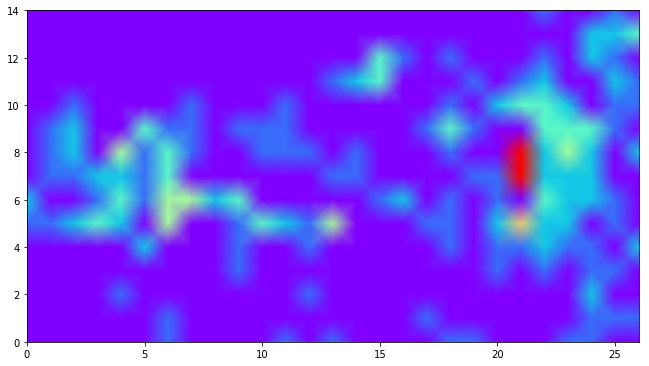

In [135]:
fig, ax = plt.subplots()
fig.set_figwidth(2.740*4)
fig.set_figheight(1.525*4)
#ax.axis('off')
ax.pcolormesh(counts,cmap=plt.get_cmap('rainbow'),shading='gouraud')

[   40.09396744  1479.06005859     6.03366137  2719.31005859]


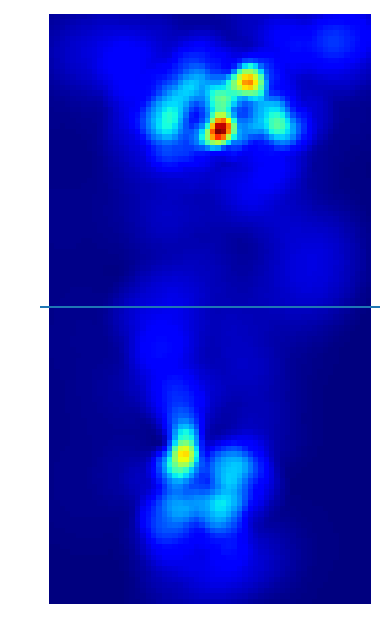

In [147]:
import sphviewer as sph
def myplot(x, y, nb=32, xsize=60, ysize=108):   
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)

    x0 = (xmin+xmax)/2.
    y0 = (ymin+ymax)/2.

    pos = np.zeros([3, len(x)])
    pos[0,:] = x
    pos[1,:] = y
    w = np.ones(len(x))

    P = sph.Particles(pos, w, nb=nb)
    S = sph.Scene(P)
    S.update_camera(r='infinity', x=x0, y=y0, z=0, 
                    xsize=xsize, ysize=ysize)
    R = sph.Render(S)
    R.set_logscale()
    img = R.get_image()
    extent = R.get_extent()
    for i, j in zip(xrange(4), [x0,x0,y0,y0]):
        extent[i] += j
    print extent
    return img, extent

fig, ax = plt.subplots()
fig.set_figheight(2.740*4)
fig.set_figwidth(1.525*4)

x,y=pts[:,0], pts[:,1]
heatmap_64, extent_64 = myplot(x,y, nb=12)

#Make the heatmap using a smoothing over 64 neighbors
ax.imshow(heatmap_64, extent=extent_64, origin='lower', aspect='auto',cmap=plt.get_cmap('jet'))
ax.set_ylim(0,2740)
ax.set_xlim(0,1525)
ax.axis('off')

mid_line = np.array([[0,1375],[1525,1375]])
ax.plot(mid_line[:,0],mid_line[:,1],linewidth=2)

plt.show()

### real world

In [40]:
def dist(a, b):
    return math.sqrt((a[0]-b[0])**2+(a[0]-b[0])**2+(a[0]-b[0])**2)

In [41]:
log = open('log.txt')
reals = []
real = []
preds = []
pred = []
last_idx = 0
for l in log.readlines():
    pt = map(float, l.strip().split(' '))
    if pt[2]<1525 and pt[2]>0 and pt[3]<2740 and pt[3]>0 and pt[4]<1000 and pt[4]>-100:
        if pt[0] == last_idx:
                if pt[1]==0:
                    if len(real)==0 or len(real)>0 and dist(real[-1], pt[2:])<500:
                        real.append(pt[2:])
                else:
                    if len(pred)==0 or len(pred)>0 and dist(pred[-1], pt[2:])<500:
                        pred.append(pt[2:])
        else:
            if len(real)>0 and len(pred)>0:
                reals.append(np.array(real, copy=True))
                preds.append(np.array(pred, copy=True))
            real = [pt[2:]]
            pred = []
            last_idx += 1
#real = np.array(real)
#pred = np.array(pred)
print len(reals), len(preds)

46 46


In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.mlab as mlab
import numpy as np
import math
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

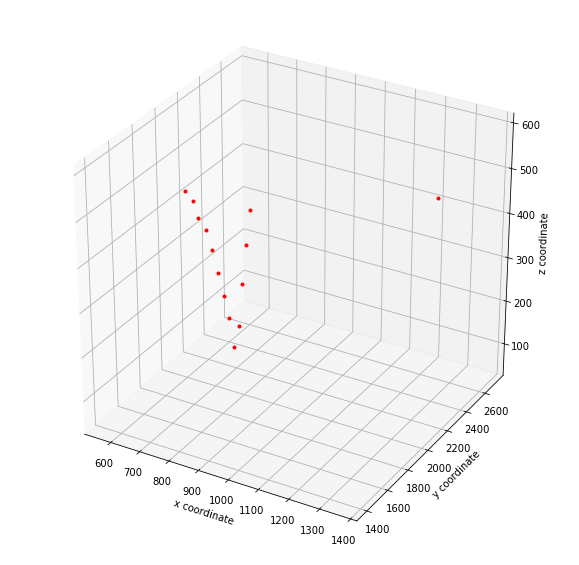

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(10):
    ax.plot(reals[i][:,0], reals[i][:,1], reals[i][:,2],'r.')
    #ax.plot(preds[i][:,0], preds[i][:,1], preds[i][:,2],'.')
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlabel('z coordinate')
plt.show()

In [26]:
def display_one(i, reals, preds):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(reals[i][:,0], reals[i][:,1], reals[i][:,2],'r.')
    ax.plot(preds[i][:,0], preds[i][:,1], preds[i][:,2],'.')

IndexError: list index out of range

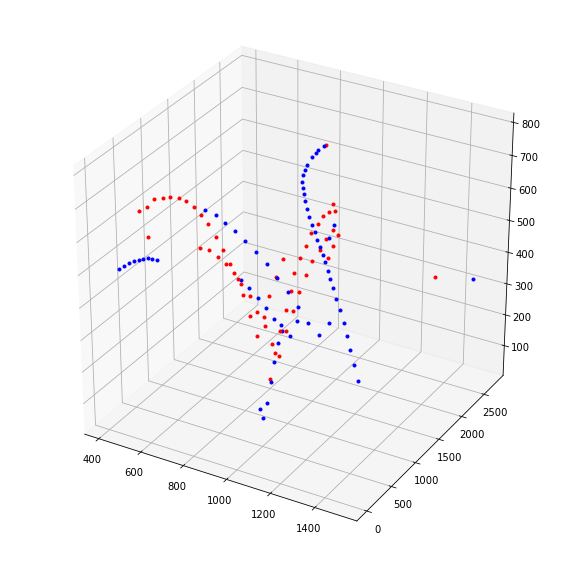

In [37]:
good = [5,6,7,41,44,51,52,54,59,63]
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in good:
    ax.plot(reals[i][:,0], reals[i][:,1], reals[i][:,2],'r.')
    ax.plot(preds[i][:,0], preds[i][:,1], preds[i][:,2],'b.')
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlabel('z coordinate')
plt.show()

### tracking visualize

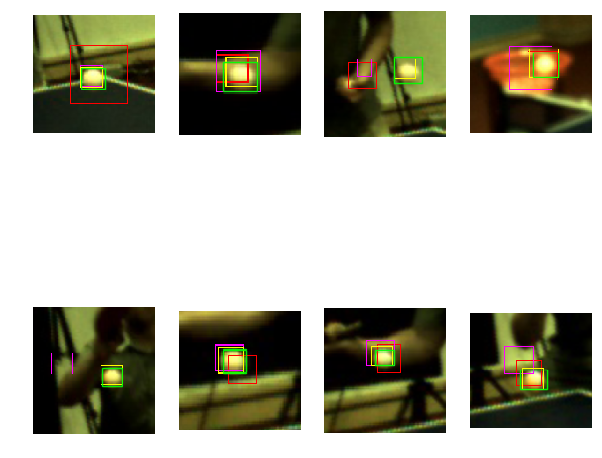

In [14]:
imgs = []
fig, ax = plt.subplots(2, 4)
for i in range(8):
    img = plt.imread('patch'+str(i+1)+'.png')
    ax[i/4,i%4].imshow(img); ax[i/4,i%4].axis('off')

In [36]:
imgs = []
for i in range(8):
    img = cv2.imread('patch'+str(i+1)+'.png')
    img = cv2.resize(img, (150,150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
imgs = np.array(imgs)
imgs.shape

(8, 150, 150, 3)

In [71]:
def vis_square(data, rows, cols):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min())*1.0 / (data.max() - data.min())
    
    # force the number of filters to be square
    #n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, 0),
               (0, 2), (0, 2))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    print data.shape
    
    # tile the filters into an image
    data = data.reshape((rows, cols) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    print data.shape
    data = data.reshape((rows * data.shape[1], cols * data.shape[3]) + data.shape[4:])
    print data.shape
    
    x = []
    y = []
    fig, ax = plt.subplots()
    ax.imshow(data);
    ax.plot(x,y,label='Groud Truth',color='green')
    ax.plot(x,y,label='Camshift',color='magenta')
    ax.plot(x,y,label='CaffeNet',color='red')
    ax.plot(x,y,label='VGGNet',color='yellow')
    ax.axis('off')
    ax.legend(loc='lower center', ncol=4)

(8, 152, 152, 3)
(2, 152, 4, 152, 3)
(304, 608, 3)


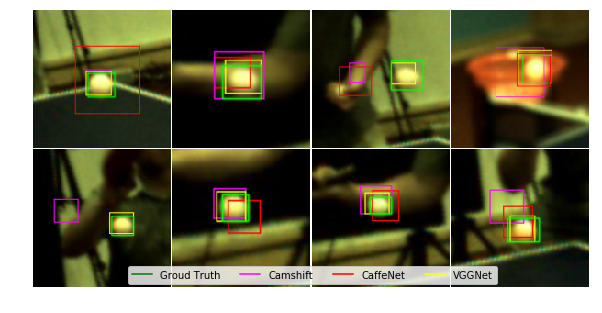

In [72]:
vis_square(imgs, 2, 4)